# Read joydata.txt

In [1]:
!cd

C:\Users\이태호\주피터 노트북\ML_Python


In [2]:
import numpy as np
data = np.genfromtxt('asset-v1_HGUk+HGU05+2018_T1+type@asset+block@JoyML/data/joydata.txt')
print(data[:5])

[[-1.72 -3.12  1.  ]
 [ 0.31  1.85  1.  ]
 [ 1.56  2.85  1.  ]
 [ 2.64  2.41  1.  ]
 [ 1.23  2.54  1.  ]]


# After shuffling, divide train and test set in 7:3 ratio

In [3]:
np.random.seed(1)
np.random.shuffle(data)

x, y = data[:,:2], data[:,2]
y = y.astype(np.int)

num = int(x.shape[0] * 0.7)
x_train, x_test = x[:num], x[num:]
y_train, y_test = y[:num], y[num:]

# add bias to feature

In [4]:
X_train = np.c_[np.ones(len(x_train)), x_train]
X_test = np.c_[np.ones(len(x_test)), x_test]
print(X_train[:5])

[[ 1.   -2.64 -2.2 ]
 [ 1.   -2.97 -1.53]
 [ 1.    1.    0.46]
 [ 1.   -2.84 -3.22]
 [ 1.   -0.05 -1.95]]


# Find weight using perceptron

In [5]:
def perceptron_train(X, y, X0=False, eta=0.1, epochs=1, random_seed=1):
    """  Perceptron training function for binary class labels
    Input Parameters
        X : numpy.ndarray, shape=(n_samples, m_features), by default X0=False
            A 2D NumPy array containing the training examples
            or 
            If X0=True, X's shape=(n_samples, m_features+1) 
            It includes the bias or x0 = 1 for all samples 
        
        y : numpy.ndarray, shape=(n_samples,)
            A 1D NumPy array containing the true class labels
        
        X0: If True, then X must have X_0 = 1 in all samples.
             Set it Faslse, if X does not have X_0 
        
        eta : float (default: 0.1) 
            A learning rate for the parameter updates. Note that a learning
            rate has no effect on the direction of the decision boundary
            if the model weights are initialized to all zeros.
        
        epochs : int (default: 1), Number of passes over the training dataset.
        
        random_seed : int or None (default: 1)
            Seed for the pseudo-random number generator that initializes the
            weights w if w is None.
    
    Returns 
        w : numpy.ndarray, shape=(m_features, )
    
        If you wants W : numpy.ndarray, shape=(epochs, m_features) to use 
        when calling , then invoke this function with epochs = 1 multiple times 
        and save the result in the form of W = np.vstack([W, w]). 
        You may initialize the W = np.array([w]), where w is an initial weights.
    """
    if X0 == False:
        X = np.c_[ np.ones(len(X)), X ]
    
    randnum = np.random.RandomState(random_seed) 
    w = randnum.normal(loc=0.0, scale=0.01, size=X.shape[1])
           
    maxlabel, minlabel = y.max(), y.min()                 # for use of bipolar or unit step function
    for _ in range(epochs):
        for xi, yi in zip(X, y):
            z = np.dot(xi, w)                             # Compute net input, same as np.dot(w.T, x)
            yhat = np.where(z > 0.0, maxlabel, minlabel)  # Apply unit step func and get output
            #print('xi{}, \t (yi,yhat)=({},{})'.format(np.round(xi,2), yi, yhat))
            if yi != yhat:
                delta = eta * (yi - yhat) * xi                # Compute delta    
                w += delta                                    # Adjust weight
                #print('xi{}, \t (yi,yhat)=({},{}), delta{}, w{}'.format
                #         (np.round(xi,2), yi, yhat, np.round(delta,2), np.round(w,2)))
        
    return w

In [6]:
w = perceptron_train(X_train, y_train, X0=True, eta=0.02, epochs=2, random_seed=5)
print('w = ', w)

w =  [-0.01558773  0.0174913   0.00890771]


# Predict & Evaluate about train and test set

### case1)

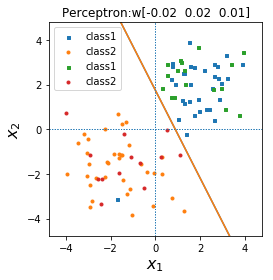

In [10]:
%run asset-v1_HGUk+HGU05+2018_T1+type@asset+block@JoyML/code/plot_xyw.py

plot_xyw(X_train, y_train, w.flatten(), X0=True)
plot_xyw(X_test, y_test, w.flatten(), X0=True)

In [11]:
def perceptron_predict(X, w):
    z = np.dot(X, w)
    yhat = np.where(z > 0., 1, 0)
    return yhat

In [12]:
yhat1 = perceptron_predict(X_train, w)
yhat2 = perceptron_predict(X_test, w)

missed1, missed2 = 0, 0
m_samples1 = len(y_train)
m_samples2 = len(y_test)

missed1 = np.sum(yhat1.flatten() != y_train)
missed2 = np.sum(yhat2.flatten() != y_test)

print("Misclassified:{}/{}".format(missed1, m_samples1))
print("Misclassified:{}/{}".format(missed2, m_samples2))

Misclassified:1/70
Misclassified:0/30


### case2)


Misclassified:1/70
Misclassified:0/30


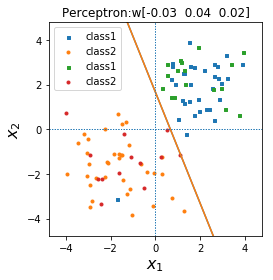

In [13]:
w = perceptron_train(X_train, y_train, X0=True, eta=0.03, epochs=2, random_seed=8)

%run asset-v1_HGUk+HGU05+2018_T1+type@asset+block@JoyML/code/plot_xyw.py

plot_xyw(X_train, y_train, w.flatten(), X0=True)
plot_xyw(X_test, y_test, w.flatten(), X0=True)

yhat1 = perceptron_predict(X_train, w)
yhat2 = perceptron_predict(X_test, w)

missed1, missed2 = 0, 0
m_samples1 = len(y_train)
m_samples2 = len(y_test)

missed1 = np.sum(yhat1.flatten() != y_train)
missed2 = np.sum(yhat2.flatten() != y_test)

print("Misclassified:{}/{}".format(missed1, m_samples1))
print("Misclassified:{}/{}".format(missed2, m_samples2))

### case3)

Misclassified:1/70
Misclassified:0/30


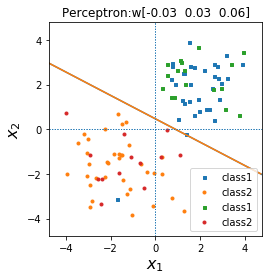

In [15]:
w = perceptron_train(X_train, y_train, X0=True, eta=0.04, epochs=2, random_seed=10)

%run asset-v1_HGUk+HGU05+2018_T1+type@asset+block@JoyML/code/plot_xyw.py

plot_xyw(X_train, y_train, w.flatten(), X0=True)
plot_xyw(X_test, y_test, w.flatten(), X0=True)

yhat1 = perceptron_predict(X_train, w)
yhat2 = perceptron_predict(X_test, w)

missed1, missed2 = 0, 0
m_samples1 = len(y_train)
m_samples2 = len(y_test)

missed1 = np.sum(yhat1.flatten() != y_train)
missed2 = np.sum(yhat2.flatten() != y_test)

print("Misclassified:{}/{}".format(missed1, m_samples1))
print("Misclassified:{}/{}".format(missed2, m_samples2))

### case4)

Misclassified:2/70
Misclassified:0/30


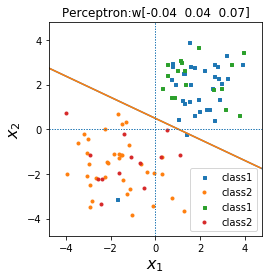

In [16]:
w = perceptron_train(X_train, y_train, X0=True, eta=0.05, epochs=2, random_seed=10)

%run asset-v1_HGUk+HGU05+2018_T1+type@asset+block@JoyML/code/plot_xyw.py

plot_xyw(X_train, y_train, w.flatten(), X0=True)
plot_xyw(X_test, y_test, w.flatten(), X0=True)

yhat1 = perceptron_predict(X_train, w)
yhat2 = perceptron_predict(X_test, w)

missed1, missed2 = 0, 0
m_samples1 = len(y_train)
m_samples2 = len(y_test)

missed1 = np.sum(yhat1.flatten() != y_train)
missed2 = np.sum(yhat2.flatten() != y_test)

print("Misclassified:{}/{}".format(missed1, m_samples1))
print("Misclassified:{}/{}".format(missed2, m_samples2))